<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />



<br><h2>PROJECT | CLASSIFICATION MODEL DEVELOPMENT</h2>
DAT-5303 | Machine Learning</h4><br>
Naila Jan - MBAN1<br>
Hult International Business School<br><br><br>



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [328]:

"""
DocString:



A. Introduction:



In this assignemnt, I have build a predictive classification model on a binary response variable (Y-variable) 
which is "isalive" in our case by using the GOT datasets.
After importing the data, I have clean it by imputing the missing values.I droped some of the variables which had
more than 98% data missing and imputing them doesnot make since in our analysis.



B. Models Tested
Created below models:
Logistic Regression
K-Nearest Neighbors Classification (KNN)
Classification Trees
Random Forest (Classification)
Gradient Boosted Models (GBM)
Tuned Random Forest
Tuned Gradient Boosted Models (GBM)




C. Model Selection

My FINAL MODEL IS TUNED GBM MODEL WHICH HAS AUC SCORE of: 0.98 with 0 test and train gap.

"""

'\nDocString:\n\n\n\nA. Introduction:\n\n\n\nIn this assignemnt, I have build a predictive classification model on a binary response variable (Y-variable) \nwhich is "isalive" in our case by using the GOT datasets.\nAfter importing the data, I have clean it by imputing the missing values.I droped some of the variables which had\nmore than 98% data missing and imputing them doesnot make since in our analysis.\n\n\n\nB. Models Tested\nCreated below models:\nLogistic Regression\nK-Nearest Neighbors Classification (KNN)\nClassification Trees\nRandom Forest (Classification)\nGradient Boosted Models (GBM)\nTuned Random Forest\nTuned Gradient Boosted Models (GBM)\n\n\n\n\nC. Model Selection\n\nMy FINAL MODEL IS TUNED GBM MODEL WHICH HAS AUC SCORE of: 0.98 with 0 test and train gap.\n\n'

In [ ]:
# Importing libraries
import random as rand                                  # random number generation
import gender_guesser.detector as gender               # guess gender based on (given) name
import numpy             as np                         # importing numpy
import pandas            as pd                         # data science essentials
import matplotlib.pyplot as plt                        # data visualization
import seaborn           as sns                        # enhanced data viz
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.linear_model import LogisticRegression    # logistic regression
import statsmodels.formula.api as smf                  # logistic regression
from sklearn.metrics import confusion_matrix           # confusion matrix
from sklearn.metrics import roc_auc_score              # auc score
from sklearn.neighbors import KNeighborsClassifier     # KNN for classification
from sklearn.neighbors import KNeighborsRegressor      # KNN for regression
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.tree import DecisionTreeClassifier        # classification trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.ensemble import RandomForestClassifier    #randomforest classification
from sklearn.ensemble import GradientBoostingClassifier#GBM classifier    
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer 

# specifying the path and file name
file = './GOT_character_predictions.xlsx'


# reading the file into Python
alive = pd.read_excel(io  =file,
                       header =0,
                       sheet_name =0)


alive

In [253]:
# looking for the missing values
alive.isnull().sum(axis=0)

S.No                             0
name                             0
title                          956
male                             0
culture                       1209
dateOfBirth                   1445
mother                        1815
father                        1810
heir                          1813
house                          414
spouse                        1580
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveFather                 1815
isAliveMother                 1810
isAliveSpouse                 1813
isAliveHeir                   1580
age                           1426
popularity                       0
isAlive                          0
dtype: int64

In [254]:
## Dropping the columns that have more than 98% missing values
## because those might not add any value to our analysis
alive= alive.drop(['S.No','dateOfBirth','mother', 'father', 'heir', 'spouse',
                   'isAliveFather', 'isAliveMother','isAliveSpouse', 'isAliveHeir', 'age'], axis = 1)

In [255]:
# looking for the missing values
alive.isnull().sum(axis=0)

name                             0
title                          956
male                             0
culture                       1209
house                          414
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
popularity                       0
isAlive                          0
dtype: int64

In [256]:
# data Cleaning of the dataset

In [329]:
# imputing  the missing values in title with unknown
alive['title']          = alive['title'].fillna('unkown')
# imputing  the missing values in culture with unknown
alive['culture']        = alive['culture'].fillna('unkown')
# imputing  the missing values in house with unknown
alive['house']          = alive['house'].fillna('unkown')


In [330]:
alive.isnull().sum(axis=0)

name                          0
title                         0
male                          0
culture                       0
house                         0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
popularity                    0
isAlive                       0
title_num                     0
house_num                     0
culture_num                   0
dtype: int64

In [331]:
#checking correlation compared to isAlive

df_corr = alive.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book2_A_Clash_Of_Kings        0.26
title_num                     0.04
book5_A_Dance_with_Dragons    0.01
house_num                     0.01
book3_A_Storm_Of_Swords      -0.01
culture_num                  -0.03
book4_A_Feast_For_Crows      -0.08
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

In [332]:
for val in alive:
    print(f" {val} + ")

 name + 
 title + 
 male + 
 culture + 
 house + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 popularity + 
 isAlive + 
 title_num + 
 house_num + 
 culture_num + 


In [261]:
# feature engineering

In [262]:
#checking the unique values of title
alive['title'].unique()

array(['King', 'King of the Andals', 'unkown', 'Good Master',
       'King of Astapor', 'Lord', 'Red Priest', 'Sealord',
       'Tradesman-Captain', 'First Sword of Braavos', 'Captain', 'Ser',
       'Prince of Dorne', 'Greenstone', 'Godsgrace', 'Blackmont',
       'Salt Shore', 'Ghost Hill', 'Lord of the Red Dunes', 'Skyreach',
       'Vaith', 'Khal', 'Magnar of Thenn', 'King-Beyond-the-Wall',
       'Green Grace', 'Cupbearer', 'Blue Grace',
       'Lord Steward of the Iron Islands', 'Lord of the Iron Islands',
       'Blacktyde', 'Lordsport', 'Lord of Southshield', 'Sealskin Point',
       'Lonely Light', 'Lord of Hammerhorn', 'Shatterstone',
       'Foamdrinker', 'Lord Reaper of Pyke', 'Lord of Oakenshield',
       'Ten Towers', 'Master of Harlaw Hall', 'Harridan Hill',
       'Tower of Glimmering', 'CastellanCommander', 'Lord of Pebbleton',
       'Red Jester', 'Volmark', 'Maester', 'Lord of Iron Holt',
       'King of the Iron Islands', 'Mistress of whisperers', 'Duskendale',
    

In [263]:
 #FEATURE ENGINEERING THE TITLE TO BECOME A ONE TITLE FOR EACH OBSERVATION
#I am doing this to be able to do getdummies

alive['title'][alive['title'].str.contains('Ser')] = 'Ser' 
alive['title'][alive['title'].str.contains('aester')] = 'Maester'
alive['title'][alive['title'].str.contains('Lord')] = 'Lord'
alive['title'][alive['title'].str.contains('Sept')] = 'Septon'
alive['title'][alive['title'].str.contains('Winterfell')] = 'Winterfell'
alive['title'][alive['title'].str.contains('Princess')] = 'Princess'
alive['title'][alive['title'].str.contains('Lady')] = 'Lady'
alive['title'][alive['title'].str.contains('King')] = 'King'
alive['title'][alive['title'].str.contains('Queen')] = 'Queen'

C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1495772294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['title'][alive['title'].str.contains('Ser')] = 'Ser'
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1495772294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['title'][alive['title'].str.contains('aester')] = 'Maester'
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1495772294.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [264]:
#checking unique values of house
alive['house'].unique()

array(['unkown', "R'hllor", 'Good Masters', 'Happy Port',
       'Iron Bank of Braavos', 'Second Sons', 'House Reed',
       'House Dayne of High Hermitage', 'House Martell', 'House Santagar',
       'House Uller', 'House Allyrion', 'Brave Companions',
       'House Blackmont', 'House Dalt', 'House Dayne', 'House Drinkwater',
       'House Gargalen', 'House Jordayne', 'House Toland', 'House Vaith',
       'House Wells', 'House Fowler', 'Thenn', 'Graces',
       'House of Galare', 'House of Ghazeen', 'House of Loraq',
       'House of Merreq', 'House of Pahl', 'Stormcrows', 'Wise Masters',
       'House Ironmaker', 'House Greyjoy', 'Drowned men',
       'House Blacktyde', 'House Botley', 'House Codd', 'House Drumm',
       'House Farwynd', 'House Farwynd of the Lonely Light',
       'House Goodbrother', 'House Goodbrother of Shatterstone',
       'House Harlaw', 'House Harlaw of Grey Garden',
       'House Harlaw of Harlaw Hall', 'House Harlaw of Harridan Hill',
       'House Harlaw of 

In [265]:
#Feature engineering the houses
# i want to group the main houses to be able to make getdummies later

alive['house'][alive['house'].str.contains('Night')] = "House Night"
alive['house'][alive['house'].str.contains('Frey')] = "House Frey"
alive['house'][alive['house'].str.contains('Stark')] = "House Stark"
alive['house'][alive['house'].str.contains('Targaryen')] = "House Targaryen"
alive['house'][alive['house'].str.contains('Lannister')] = "House Lannister"
alive['house'][alive['house'].str.contains('Greyjoy')] = "House Greyjoy"
alive['house'][alive['house'].str.contains('Tyrell')] = "House Tyrell"
alive['house'][alive['house'].str.contains('Martell')] = "House Martell"
alive['house'][alive['house'].str.contains('Osgrey')] = "House Osgrey"

C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1614877960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['house'][alive['house'].str.contains('Night')] = "House Night"
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1614877960.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['house'][alive['house'].str.contains('Frey')] = "House Frey"
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/1614877960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [266]:
#checking unique values of culture
alive['culture'].unique()

array(['Andal', 'Andals', 'Asshai', 'Astapor', 'Astapori', 'Braavos',
       'Braavosi', 'Crannogmen', 'Dorne', 'Dornish', 'Dornishmen',
       'Dothraki', 'First Men', 'Free Folk', 'Free folk', 'free folk',
       'Ghiscari', 'Ghiscaricari', 'Ironborn', 'ironborn', 'Ironmen',
       'Lhazarene', 'Lysene', 'Lyseni', 'Meereen', 'Meereenese', 'Myrish',
       'Naathi', 'Northern mountain clans', 'Northmen', 'northmen',
       'Pentoshi', 'Qarth', 'Qartheen', 'Reach', 'Rivermen', 'Sistermen',
       'Stormlands', 'Summer Islander', 'Summer Isles', 'Tyroshi', 'Vale',
       'Vale mountain clans', 'Valemen', 'Valyrian', 'Westerman',
       'Westermen', 'westermen', 'Westeros', 'Wildling', 'Wildlings',
       'unkown', 'Lhazareen', 'Norvos', 'Norvoshi', 'Qohor', 'Rhoynar',
       'Riverlands', 'Stormlander', 'Summer Islands', 'Westerlands'],
      dtype=object)

In [267]:
#using str.contains from pandas to check for a string inside the observation of culture
#Feature engineering the cultures to group them into the main cultures

alive['culture'][alive['culture'].str.contains('North')] = "Northmen"
alive['culture'][alive['culture'].str.contains('ron')] = "Ironmen"
alive['culture'][alive['culture'].str.contains('ree')] = "Free Folks"
alive['culture'][alive['culture'].str.contains('Valyrian')] = "Valyrian"
alive['culture'][alive['culture'].str.contains('Braavos')] = "Braavos"
alive['culture'][alive['culture'].str.contains('Dorn')] = "Dornish"
alive['culture'][alive['culture'].str.contains('Ghiscari')] = "Ghiscar"
alive['culture'][alive['culture'].str.contains('Dothraki')] = "Dothraki"
alive['culture'][alive['culture'].str.contains('Vale')] = "Valemen"


C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/601972407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['culture'][alive['culture'].str.contains('North')] = "Northmen"
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/601972407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive['culture'][alive['culture'].str.contains('ron')] = "Ironmen"
C:\Users\Neena\AppData\Local\Temp/ipykernel_16560/601972407.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [268]:
# Creating a numeric variable for title

alive['title_num'] = (pd.factorize(alive['title'], 
                                            sort=True)[0] + 1)
# Creating a numeric variable for house

alive['house_num'] = (pd.factorize(alive['house'], 
                                            sort=True)[0] + 1)

# Creating a numeric variable for culture

alive['culture_num'] = (pd.factorize(alive['culture'], 
                                            sort=True)[0] + 1)

In [269]:
# showing the updated head of dataframe
alive.head()

,name,title,male,culture,house,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,popularity,isAlive,title_num,house_num,culture_num
0,Erreg,King,0,Andal,unkown,0,0,1,0,0,0.016722,1,89,328,1
1,Hugor of the Hill,King,1,Andals,unkown,0,0,0,0,1,0.050167,1,89,328,2
2,Azor Ahai,unkown,0,Asshai,unkown,0,1,1,1,1,0.117057,1,174,328,3
3,Melisandre,unkown,0,Asshai,R'hllor,0,1,1,1,1,0.745819,1,174,316,3
4,Kraznys mo Nakloz,unkown,1,Astapor,Good Masters,0,0,1,0,1,0.076923,0,174,18,4


In [333]:
# Creating dummies for categorical data - culture and house
title_dummies = pd.get_dummies((alive['title']), 
                                drop_first = True)

culture_dummies = pd.get_dummies((alive['culture']), 
                                  drop_first = True)

house_dummies = pd.get_dummies((alive['house']), 
                                drop_first = True)

alive_with_dummies = pd.concat(
                            [alive.loc[:, :],
                             title_wdummies, culture_wdummies, house_wdummies],
                             axis = 1)

In [271]:
alive_with_dummies

,name,title,male,culture,house,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,...,Stormcrows,Summer Islands,The Citadel,Thenn,Undying Ones,Unsullied,Windblown,Wise Masters,unkown,wildling
0,Erreg,King,0,Andal,unkown,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Hugor of the Hill,King,1,Andals,unkown,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,Azor Ahai,unkown,0,Asshai,unkown,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3,Melisandre,unkown,0,Asshai,R'hllor,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Kraznys mo Nakloz,unkown,1,Astapor,Good Masters,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Rugen,Undergaoler,1,unkown,unkown,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1832,Shae,unkown,0,unkown,unkown,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1833,Shella,unkown,0,unkown,unkown,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1834,Tion Frey,unkown,1,unkown,unkown,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0


In [272]:
#  *********************   user define function


In [334]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [335]:
# declaring explanatory variables
alive_data   = alive.drop(['isAlive'], axis = 1)


# declaring response variable
alive_target = alive.loc[ : , 'isAlive' ]

In [336]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     =  alive_target) # preserving balance


# merging training data for statsmodels
alive_train = pd.concat([x_train, y_train], axis = 1)

In [337]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [338]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~    
                                                     book1_A_Game_Of_Thrones + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     popularity 
                                                   
                                                     """,
                                        data    = alive_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.558443
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.042     
Dependent Variable:   isAlive            AIC:                1855.0960 
Date:                 2022-03-27 17:10   BIC:                1882.1447 
No. Observations:     1652               Log-Likelihood:     -922.55   
Df Model:             4                  LL-Null:            -962.51   
Df Residuals:         1647               LLR p-value:        1.8119e-16
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.2594   0.0838 15.0266 0.0000  1.0951  1.4237
book1_A_Game_Of_Thrones -0.5828   0.1508 -3.8652 0.0001 -0.8783 -0.2873
book3_A_Storm_Of_Swords  0.2900   0.1307  2.2187 0.0265  0.0338  0.5461
book4_A_Feast_For_Crows -0.1691   0.1392 -1.2145 0.2246 -0.4420  0.1038
popularity              -2.3117   0.3958 -5.8408 0.0000 -3.0874 -1.5360
=======================================================================

"""

# Logestic Regression

In [380]:
# train/test split with the full model
alive_data   =  alive.loc[ : ,  [  'book1_A_Game_Of_Thrones', 
                                                         'house_num',
                                                         'title_num',
                                                         'culture_num',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows', 
                                                         'popularity'] ]
alive_target =  alive.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            alive_data ,
            alive_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = alive_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(2))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(2) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(2) # accuracy
# area under the roc curve (auc)
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                            y_score = logreg_pred).round(decimals = 2))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 2)

# displaying and saving the gap between training and testing
print('Logistic Gap :', abs(logreg_test_score - logreg_train_score).round(2))
logreg_test_gap = abs(logreg_test_score - logreg_train_score).round(2)


Training ACCURACY: 0.73
Testing  ACCURACY: 0.78
AUC Score        : 0.6
Logistic Gap : 0.05


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [381]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 10  40]
 [  1 133]]


In [382]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 10
False Positives: 40
False Negatives: 1
True Positives : 133



# KNN Classification

In [383]:
############# KNN Modeling Data #############
alive_data = alive.loc[ : , [      'book1_A_Game_Of_Thrones', 
                                                         'title_num',
                                                         'culture_num',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows', 
                                                         'popularity'
                                                        
                                                          ] ]
alive_target = alive.loc[ :, 'isAlive']

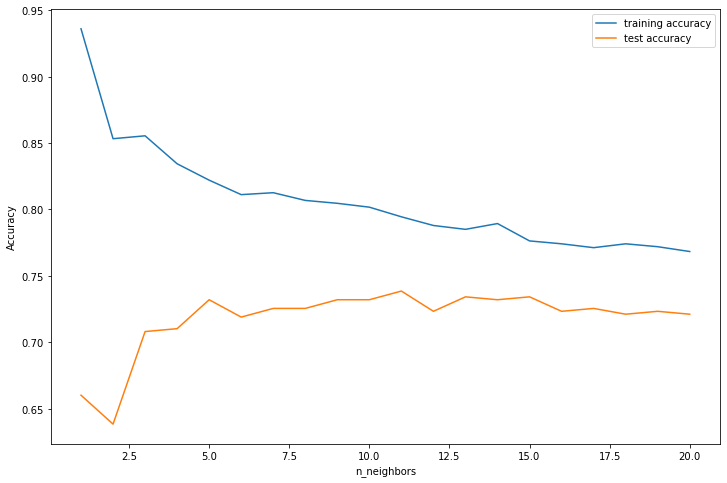

The optimal number of neighbors is: 11


In [384]:
########## MODEL FOR KNN #############
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = alive_data,
                                  y_data        = alive_target,
                                  response_type = 'class')

In [385]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(alive_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(alive_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(2))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(2))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(2)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(2)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(2)

# displaying and saving the gap between training and testing
print('Knn Gap :', abs(knn_test_score  - knn_train_score).round(2))
knn_gap = abs(knn_test_score  - knn_train_score).round(2)


Training ACCURACY: 0.79
Testing  ACCURACY: 0.78
AUC Score        : 0.66
Knn Gap : 0.01


In [386]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 9
True Positives : 125



# CART MODEL

In [387]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [388]:
############# CART Modeling Data #############
alive_data = alive.loc[ : , [      'book1_A_Game_Of_Thrones', 
                                                         'title_num',
                                                         'culture_num',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows', 
                                                         'popularity'
                                                        
                                                          ] ]
alive_target = alive.loc[ :, 'isAlive']

In [389]:
# train-test split with the scaled data
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)

In [390]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(2))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(2))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(2))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(2) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(2)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(2) # auc

# displaying and saving the gap between training and testing
print('Cart Gap :', abs(full_tree_train_score  - full_tree_test_score).round(2))
cart_gap = abs(full_tree_train_score  - full_tree_test_score).round(2)

Full Tree Training ACCURACY: 0.92
Full Tree Testing ACCURACY : 0.74
Full Tree AUC Score: 0.64
Cart Gap : 0.18


In [391]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 21
False Positives: 29
False Negatives: 18
True Positives : 116



# Prune Tree

In [392]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 6,
                                     min_samples_leaf = 25,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(2))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(2) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(2) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(2) # auc
# displaying and saving the gap between training and testing
print('Full Tree Gap :', abs(pruned_tree_test_score   - pruned_tree_train_score).round(2))
FullTree_gap = abs(pruned_tree_test_score   - pruned_tree_train_score).round(2)

Training ACCURACY: 0.78
Testing  ACCURACY: 0.78
AUC Score        : 0.64
Full Tree Gap : 0.0


In [393]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pruned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 8
True Positives : 126



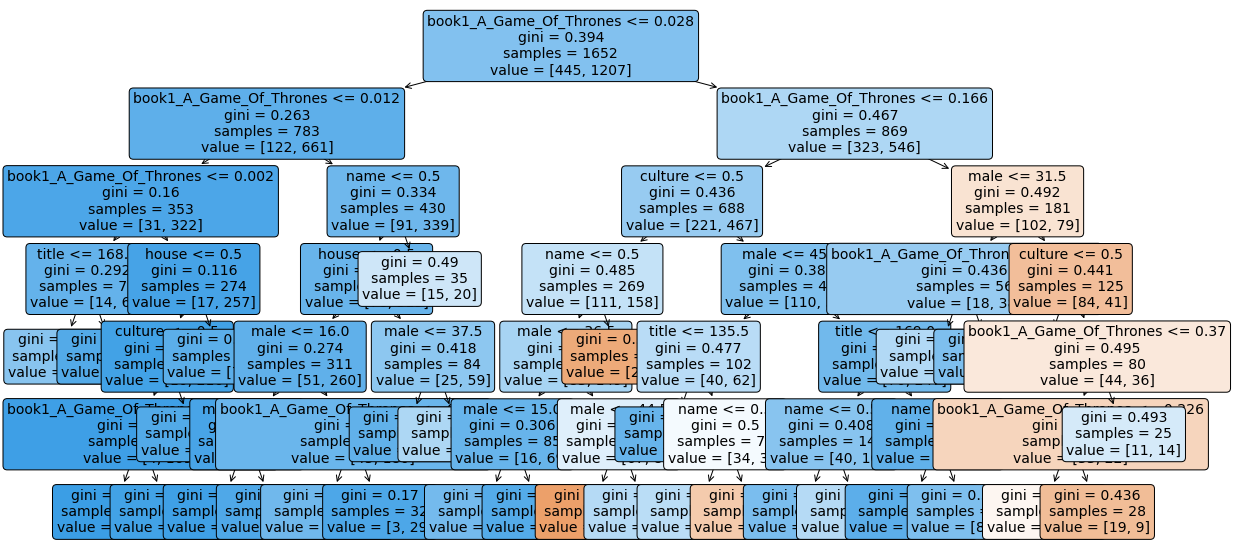

In [394]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned, # changing to pruned_tree_fit
          feature_names = alive.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

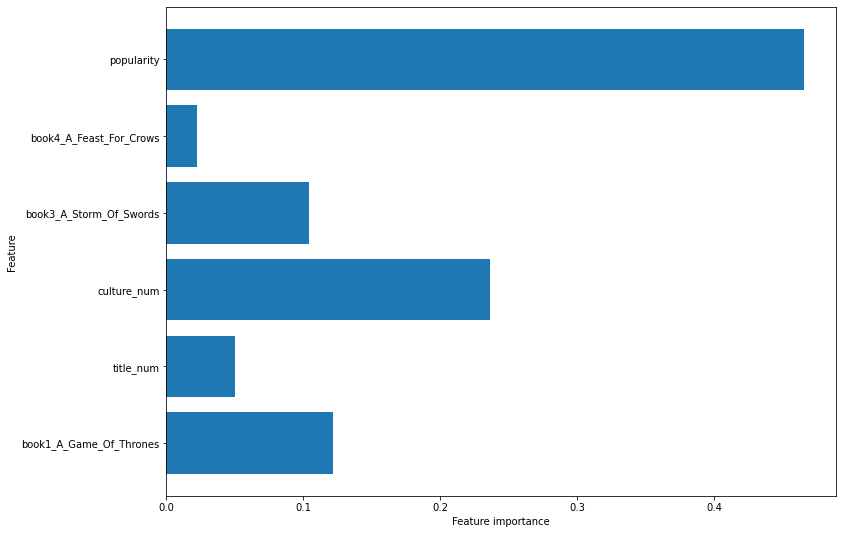

In [395]:
# plotting feature importance
plot_feature_importances(tree_pruned,
                         train = x_train,
                         export = False)

In [396]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6         (10, 40, 1, 133)
Full Tree     0.64           (21, 29, 18, 116)
Pruned Tree   0.64         (17, 33, 8, 126)



# Random Forest

In [397]:
#### EXPLANATORY VARIABLES and Target FOR RANDOM FOREST MODEL
# train/test split with the full model
alive_data   =  alive.loc[ : ,  [  'book1_A_Game_Of_Thrones',  
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                       
                                                         'title_num',
                                                         'culture_num',
                                                         'house_num',
                                                         'popularity'
                                                         
                                                         ] ]
alive_target =  alive.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)

In [398]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 6,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [399]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(2))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(2))

# displaying and saving the gap between training and testing
print('RandomForest Gap :', abs(rf_default_fit.score(x_train, y_train) 
                            - rf_default_fit.score(x_test, y_test)).round(2))
rf_gap = abs(rf_default_fit.score(x_train, y_train) 
                            - rf_default_fit.score(x_test, y_test)).round(2)

Training ACCURACY: 0.81
Testing  ACCURACY: 0.8
AUC Score        : 0.66
RandomForest Gap : 0.01


In [400]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 4
True Positives : 130



In [401]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(2)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(2)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(2)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.60,0.73,0.78,"(10, 40, 1, 133)"
1,Full Tree,0.64,0.92,0.74,"(21, 29, 18, 116)"
2,Pruned Tree,0.64,0.78,0.78,"(17, 33, 8, 126)"
3,Random Forest (Full),0.66,0.81,0.80,"(17, 33, 4, 130)"


# GRADIENT BOOSTED MACHINES MODEL

In [402]:
### GRADIENT BOOSTED MACHINES MODEL ###
# train/test split with the full model
alive_data   =  alive.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'title_num',
                                                         'culture_num',
                                                          'house_num',
                                                         'popularity'
                                                         
                                                         ] ]
alive_target =  alive.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)

In [403]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 5,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(2))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(2))
# displaying and saving the gap between training and testing
print('GBM Gap :', abs(full_gbm_default_fit.score(x_train, y_train)  - full_gbm_default_fit.score(x_test, y_test)).round(2))
GBM_gap = abs(full_gbm_default_fit.score(x_train, y_train)  - full_gbm_default_fit.score(x_test, y_test)).round(2)


Training ACCURACY: 0.91
Testing ACCURACY : 0.8
AUC Score        : 0.7
GBM Gap : 0.11


In [404]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 10
True Positives : 124



In [405]:
# declaring model performance objects
gbm_train_df_acc = full_gbm_default_fit.score(x_train, y_train).round(2)
gbm_test_df_acc  = full_gbm_default_fit.score(x_test, y_test).round(2)
gbm_auc_df      = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(2)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_df_acc,
                          'Testing Accuracy'  : gbm_test_df_acc,
                          'AUC Score'         : gbm_auc_df,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.60,0.73,0.78,"(10, 40, 1, 133)"
1,Full Tree,0.64,0.92,0.74,"(21, 29, 18, 116)"
2,Pruned Tree,0.64,0.78,0.78,"(17, 33, 8, 126)"
3,Random Forest (Full),0.66,0.81,0.80,"(17, 33, 4, 130)"
4,GBM (Full),0.70,0.91,0.80,"(24, 26, 10, 124)"


#  Tuned Random Forest

In [406]:
alive_data   =  alive.loc[ : ,  [  'book1_A_Game_Of_Thrones',  
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'house_num',
                                                         'culture_num',
                                                         
                                                         'popularity'
                                                         
                                                         ] ]
alive_target =  alive.loc[ : , 'isAlive']
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)

In [407]:
# # # FITTING the training data
# rf_default_fit = rf_default.fit(x_train, y_train)




# # # PREDICTING based on the testing set
# rf_default_fit_pred = rf_default_fit.predict(x_test)




# # # declaring a hyperparameter space
# estimator_range = np.arange(100, 1100, 250)
# leaf_range = np.arange(1, 31, 10)
# criterion_range = ['gini', 'entropy']
# bootstrap_range = [True, False]
# warm_start_range = [True, False]




# # # creating a hyperparameter grid
# param_grid = {'n_estimators' : estimator_range,
# 'min_samples_leaf' : leaf_range,
# 'criterion' : criterion_range,
# 'bootstrap' : bootstrap_range,
# 'warm_start' : warm_start_range}




# # # INSTANTIATING the model object without hyperparameters
# forest_grid = RandomForestClassifier(random_state = 219)




# # # GridSearchCV object
# forest_cv = RandomizedSearchCV(estimator = forest_grid,
# param_distributions = param_grid,
# cv = 3,
# n_iter = 500,
# scoring = make_scorer(roc_auc_score,
# needs_threshold = False))




# # # FITTING to the FULL DATASET (due to cross-validation)
# forest_cv.fit(gca_data, gca_target)




# # # PREDICT step is not needed




# # # printing the optimal parameters and best score
# print("Tuned Parameters :", forest_cv.best_params_)
# print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [420]:
# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'entropy',
                                      min_samples_leaf = 5,
                                      n_estimators     = 250,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(alive_data, alive_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(2))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(2))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(2))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(2) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(2)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(2) # auc

# displaying and saving the gap between training and testing
print('Tuned forest Gap :', abs(forest_tuned.score(x_train, y_train) 
                            - forest_tuned.score(x_test, y_test)).round(2))
tuned_rf_gap = abs(forest_tuned.score(x_train, y_train) 
                            - forest_tuned.score(x_test, y_test)).round(2)

Forest Tuned Training ACCURACY: 0.88
Forest Tuned Testing  ACCURACY: 0.9
Forest Tuned AUC Score        : 0.82
Tuned forest Gap : 0.02


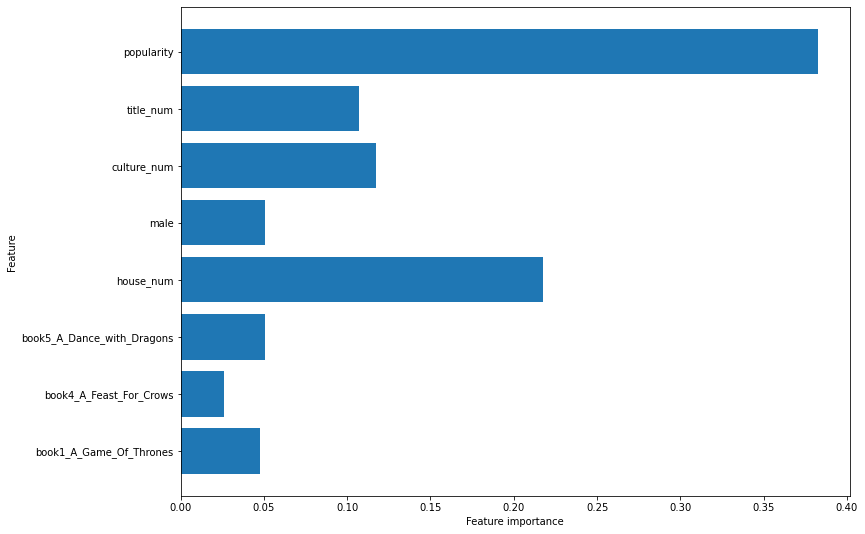

In [421]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [422]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 2
True Positives : 132



In [423]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}           {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6         (10, 40, 1, 133)
Full Tree     0.64           (21, 29, 18, 116)
Pruned Tree   0.64         (17, 33, 8, 126)



# HyperParameter Tuning the GBM Model 

In [424]:
# setting explanatory variables and target variable
alive_data   =  alive.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                                         'book4_A_Feast_For_Crows',
                                                         'book5_A_Dance_with_Dragons',
                                                         'house_num',
                                                          'male',
                                                         'culture_num',
                                                         'title_num',
                                                         'popularity'
                                                         ] ]
alive_target =  alive.loc[ : , 'isAlive']

In [425]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            alive_data,
            alive_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = alive_target)

In [426]:
alive_target

0       1
1       1
2       1
3       1
4       0
       ..
1831    1
1832    0
1833    1
1834    0
1835    1
Name: isAlive, Length: 1836, dtype: int64

In [427]:
# # declaring a hyperparameter space
# learn_range        = np.arange(0.1, 2.2, 0.5)
# estimator_range    = np.arange(100, 501, 25)
# depth_range        = np.arange(2, 11, 2)
# warm_start_range   = [True, False]

# # creating a hyperparameter grid
# param_grid = {'learning_rate' : learn_range,
#               'max_depth'     : depth_range,
#               'n_estimators'  : estimator_range,
#               'warm_start'    : warm_start_range}


# # INSTANTIATING the model object without hyperparameters
# full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# # GridSearchCV object
# full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                            param_distributions = param_grid,
#                            cv                  = 3,
#                            n_iter              = 500,
#                            random_state        = 219,
#                            scoring             = make_scorer(roc_auc_score,
#                                                  needs_threshold = False))


# # FITTING to the FULL DATASET (due to cross-validation)
# full_gbm_cv.fit(alive_data, alive_target)


# # PREDICT step is not needed


# # printing the optimal parameters and best score
# print("Tuned Parameters  :", full_gbm_cv.best_params_)
# print("Tuned Training AUC:", full_gbm_cv.best_score_.round(2))

In [428]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.5,
                                       max_depth     = 7,
                                       n_estimators  = 350,
                                       warm_start    = False,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(alive_data, alive_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(2))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(2))

# displaying and saving the gap between training and testing
print('Tuned GBM Gap :', abs(gbm_tuned_fit.score(x_train, y_train) 
                            - gbm_tuned_fit.score(x_test, y_test)).round(2))
tuned_gbm_gap = abs(gbm_tuned_fit.score(x_train, y_train) 
                            - gbm_tuned_fit.score(x_test, y_test)).round(2)



Training ACCURACY: 0.98
Testing  ACCURACY: 0.98
AUC Score        : 0.98
Tuned GBM Gap : 0.0


In [429]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 48
False Positives: 2
False Negatives: 1
True Positives : 133



In [430]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(2)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(2)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(2)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.60,0.73,0.78,"(10, 40, 1, 133)"
1,Full Tree,0.64,0.92,0.74,"(21, 29, 18, 116)"
2,Pruned Tree,0.64,0.78,0.78,"(17, 33, 8, 126)"
3,Tuned GBM,0.98,0.98,0.98,"(48, 2, 1, 133)"


In [419]:
# comparing results
print("The confusion matrix is shown as: TrueNegative, FalsePositive, FalseNegative, TruePositive")
print(f"""
Model        AUC Score        Train Score        Test Score        Test Gap          Confusion Matrix
-----        -----------        ----------        -----------       -----------       ------------------
Logistic      {logreg_auc_score}              {logreg_train_score}             {logreg_test_score}                {logreg_test_gap}             {logreg_tn},{logreg_fp},{logreg_fn},{logreg_tp}
KNN           {knn_auc_score}              {knn_train_score}             {knn_test_score}                {knn_gap}             {knn_tree_tn},{knn_tree_fp},{knn_tree_fn},{knn_tree_tp}
FullTREE      {full_tree_auc_score}              {full_tree_train_score}             {full_tree_test_score}                {FullTree_gap}             {full_tree_tn},{full_tree_fp},{full_tree_fn},{full_tree_tp}
RandForest    {rf_auc}              {rf_train_acc}             {rf_test_acc}                 {rf_gap}             {rf_tn},{rf_fp},{rf_fn},{rf_tp}
GBM           {gbm_auc_df}               {gbm_train_df_acc}              {gbm_test_df_acc}               {GBM_gap}              {gbm_default_tn},{gbm_default_fp},{gbm_default_fn},{gbm_default_tp}
Tuned RF      {tuned_rf_auc}            {tuned_rf_train_acc}          {tuned_rf_test_acc}              {tuned_rf_gap}              {tuned_rf_tn},{tuned_rf_fp},{tuned_rf_fn},{tuned_rf_tp}
Tuned GBM*    {gbm_auc}              {gbm_train_acc}             {gbm_test_acc}                {tuned_gbm_gap}               {gbm_tuned_tn},{gbm_tuned_fp},{gbm_tuned_fn},{gbm_tuned_tp}
""")

print(" * Is my selected model, because of the minimum gap & highest AUC score ")



The confusion matrix is shown as: TrueNegative, FalsePositive, FalseNegative, TruePositive

Model        AUC Score        Train Score        Test Score        Test Gap          Confusion Matrix
-----        -----------        ----------        -----------       -----------       ------------------
Logistic      0.6              0.73             0.78                0.05             10,40,1,133
KNN           0.66              0.79             0.78                0.01             19,31,9,125
FullTREE      0.64              0.92             0.74                0.0             21,29,18,116
RandForest    0.66              0.81             0.8                 0.01             17,33,4,130
GBM           0.7               0.91              0.8               0.11              24,26,10,124
Tuned RF      0.8088            0.8705          0.8859              0.02              32,18,3,131
Tuned GBM*    0.98              0.98             0.98                0.0               48,2,1,133

 * Is my selec